# Data Preprocessing
Preprocessing the stock data and uploading it to GoogleDrive.


## Import libraries and get sample data

In [ ]:
# yfinance = yahoo finance library that allows to download market data from yahoo finance
!pip install yfinance

     |████████████████████████████████| 6.4 MB 7.3 MB/s 
     |████████████████████████████████| 63 kB 1.5 MB/s 
  Attempting uninstall: requests
    Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0
  Attempting uninstall: lxml
    Found existing installation: lxml 4.2.6
    Uninstalling lxml-4.2.6:
      Successfully uninstalled lxml-4.2.6
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires requests~=2.23.0, but you have requests 2.27.1 which is incompatible.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is incompatible.


In [ ]:
# Import libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf
import os


# Defaults
plt.rcParams['figure.figsize'] = (20.0, 10.0)
plt.rcParams.update({'font.size': 12})
plt.style.use('ggplot')

In [ ]:
yf.tickers

<module 'yfinance.tickers' from '/usr/local/lib/python3.7/dist-packages/yfinance/tickers.py'>

## Download the Dataset

In [ ]:
# Set the start and end dates for the stock prices
start_date = '2007-01-01'
end_date = '2021-12-31'

# Download the data for the company of interest
goog_df = yf.download('GOOG',               # GOOG is Alphabet company ticker symbol 
                      start=start_date, 
                      end=end_date, 
                      progress=False,
                      )



In [ ]:
# List of all the indexes to use
index_list = ['^NDXT', 'QTEC', '^SP500-45']

# NASDAQ 100 Technology Sector (^NDXT)
# First Trust NASDAQ-100-Technology Sector Index Fund (QTEC)
# S&P 500 Information Technology (Sector) (^SP500-45)

# Go through each index and add the closing price to the dataframe.
for index_name in index_list:

  index_df = yf.download(index_name,  
                      start=start_date, 
                      end=end_date,
                      progress=False,
                      )
  index_close = index_df['Close'].copy()
  goog_df[index_name+'_Close'] = index_close

goog_df.head()

,Open,High,Low,Close,Adj Close,Volume,ticker,^NDXT_Close,QTEC_Close,^SP500-45_Close
Date,,,,,,,,,,
2007-01-03,232.129913,237.440018,229.694046,232.921951,232.921951,15470772,GOOG,1075.910034,19.990000,357.420013
2007-01-04,233.624313,241.071411,233.300537,240.727692,240.727692,15834329,GOOG,1097.079956,20.379999,363.790009
2007-01-05,240.349106,242.839783,238.162308,242.685349,242.685349,13795717,GOOG,1090.930054,20.290001,361.489990
2007-01-08,242.934418,244.020355,240.199677,240.887100,240.887100,9544441,GOOG,1093.439941,20.370001,362.350006
2007-01-09,241.818604,243.213379,239.701538,241.843506,241.843506,10803142,GOOG,1096.359985,20.450001,364.079987


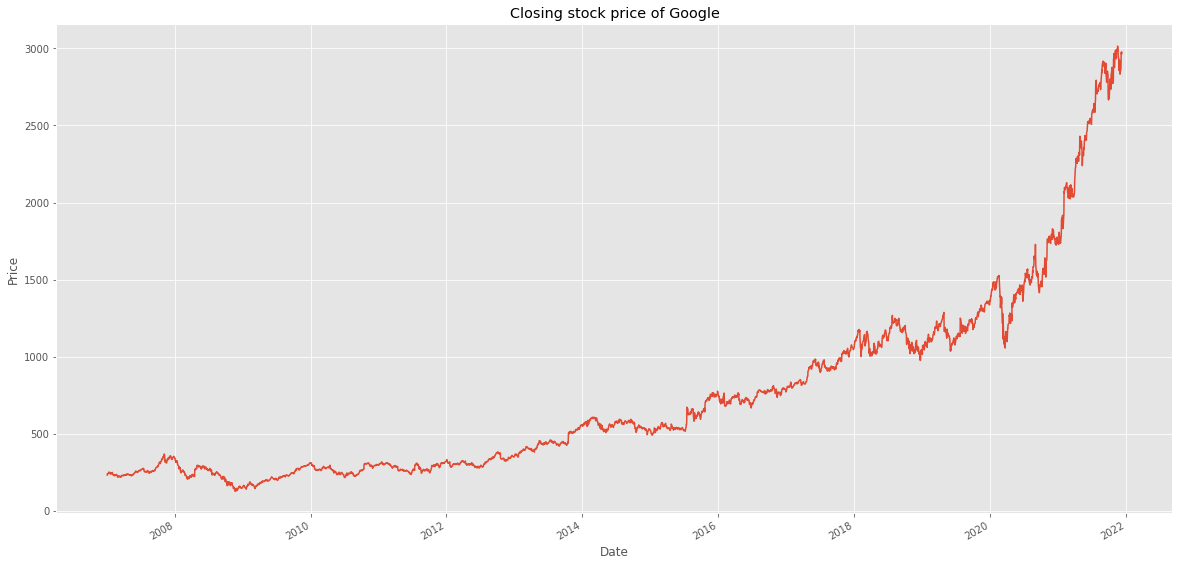

In [ ]:
# Plot the Graph
goog_df["Close"].plot()
plt.title("Closing stock price of Google")
plt.ylabel('Price')
plt.xlabel('Date')
plt.show()

## Impute Missing Data Points
The NaNs will be replaced with the last valid value in the data.

In [ ]:
 #The any() method can be used to check if any item in an iterable object evaluates to True.
 # The all() method can be used to check if all items in an iterable object evaluate to True.

if goog_df.isnull().values.any() == True:
  print("There are", goog_df.isnull().sum().sum(), " missing data points.")
  # Impute the missing/NaN values. 
  goog_df = goog_df.fillna(method="ffill") # ffill: Use prev, bfill: Use next.

  numNaNs = goog_df.isnull().sum().sum()

  print("There are now ", numNaNs, " missing data points.")
  
  assert numNaNs == 0
else:
  print("There are no missing data points")

goog_df.head()

There are 6  missing data points.
There are now  0  missing data points.


,Open,High,Low,Close,Adj Close,Volume,^NDXT_Close,QTEC_Close,^SP500-45_Close
Date,,,,,,,,,
2007-01-03,232.129913,237.440018,229.694046,232.921951,232.921951,15470772,1075.910034,19.990000,357.420013
2007-01-04,233.624313,241.071411,233.300537,240.727692,240.727692,15834329,1097.079956,20.379999,363.790009
2007-01-05,240.349106,242.839783,238.162308,242.685349,242.685349,13795717,1090.930054,20.290001,361.489990
2007-01-08,242.934418,244.020355,240.199677,240.887100,240.887100,9544441,1093.439941,20.370001,362.350006
2007-01-09,241.818604,243.213379,239.701538,241.843506,241.843506,10803142,1096.359985,20.450001,364.079987


## Split the Dataset
Split into Train, Validation and Test Datasets.

In [ ]:
split = 0.8

totalRows = len(goog_df.index)
print("Total data points:", totalRows)

numTrain = round(totalRows * split)
numTest = totalRows - numTrain

train_data = goog_df.head(numTrain)
test_data = goog_df.tail(numTest)

# ### For VALIDATION dataset, if required ###
# halfTestNum = round(numTest/2)
# valid_data = test_data.head(halfTestNum)
# test_data = test_data.tail(numTest-halfTestNum)


print("Number of training points:", len(train_data))
# print("Number of validation points", len(valid_data))
print("Number of testing points:", len(test_data))

Total data points: 3763
Number of training points: 3010
Number of testing points: 753


## Normalize Data
Normalise the features of the data, so that each feature has a mean of 0 and a standard deviation of 1. 

In [ ]:
# Normalise each of the features/columns so they have mean=0, std=1.

norm_train_data = (train_data-train_data.mean()) / train_data.std()
norm_test_data = (test_data-train_data.mean()) / train_data.std()

# Upload datasets to Google Drive
This will create a new folder (*Deep_Learning_Project_Data*) and upload four csv files to it:

*   train_data.csv
*   test_data.csv

*   not_norm_train_data.csv
*   not_norm_train_data.csv

In [ ]:
# Mount onto Google Drive
from google.colab import drive
drive.mount('drive')

# Move to Google Drive and create folder
%cd /content/drive/My\ Drive

Mounted at drive
/content/drive/My Drive


In [ ]:
# Create folder on Google Drive (if it doesn't exist)
if not os.path.exists('Deep_Learning_Project_Data'):
  os.makedirs('Deep_Learning_Project_Data')
  print("Folder created")

%cd "Deep_Learning_Project_Data"

# Convert dataframes to CSV files.
train_data.to_csv('train_data.csv')
test_data.to_csv('test_data.csv')

norm_train_data.to_csv('normal_train_data.csv')
norm_test_data.to_csv('normal_test_data.csv')

# Copy CSV files to drive.
!cp train_data.csv "train_data.csv"
!cp test_data.csv "test_data.csv"

!cp norm_train_data.csv "normal_train_data.csv"
!cp norm_test_data.csv "normal_test_data.csv"

Folder created
/content/drive/My Drive/Deep_Learning_Project_Data
cp: 'train_data.csv' and 'train_data.csv' are the same file
cp: 'test_data.csv' and 'test_data.csv' are the same file
cp: cannot stat 'norm_train_data.csv': No such file or directory
cp: cannot stat 'norm_test_data.csv': No such file or directory


## Correlation in the Data

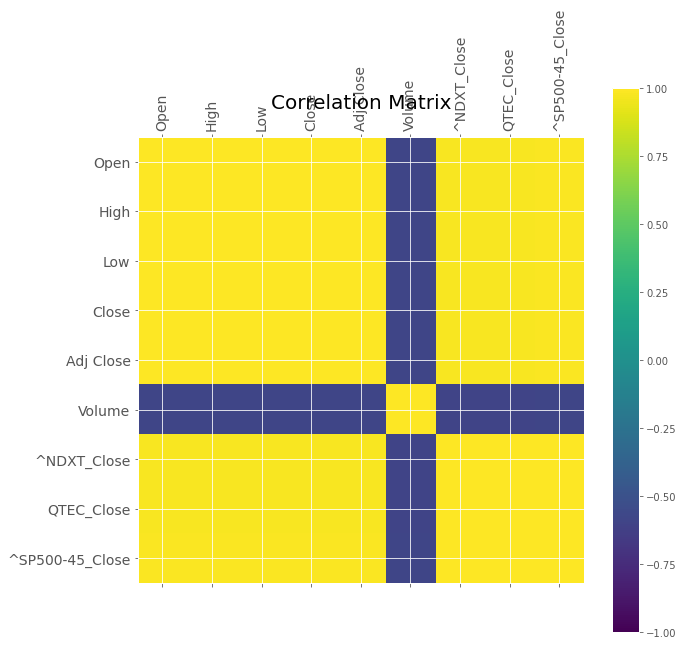

In [ ]:
# Visualize the correlation matrix.
fig = plt.figure(figsize=(10,10)) 
ax = fig.add_subplot(111) # 1x1 grid, first subplot.
fig.colorbar(ax.matshow(train_data.corr(), vmin=-1, vmax=1)) 
ticks = np.arange(len(train_data.corr().columns))
ax.tick_params(axis='x', which='major', labelsize=14, rotation=90)
ax.tick_params(axis='y', which='major', labelsize=14, rotation=0)
ax.set_xticks(ticks)
ax.set_yticks(ticks)
ax.set_xticklabels(train_data.corr().columns)
ax.set_yticklabels(train_data.corr().columns)
plt.title("Correlation Matrix", fontsize=20)
plt.show()

In [ ]:
train_data.corr()

,Open,High,Low,Close,Adj Close,Volume,^NDXT_Close,QTEC_Close,^SP500-45_Close
Open,1.000000,0.999878,0.999812,0.999687,0.999687,-0.582083,0.981474,0.981215,0.985225
High,0.999878,1.000000,0.999788,0.999833,0.999833,-0.579619,0.981503,0.981233,0.985463
Low,0.999812,0.999788,1.000000,0.999880,0.999880,-0.585903,0.981828,0.981575,0.985340
Close,0.999687,0.999833,0.999880,1.000000,1.000000,-0.583062,0.981808,0.981543,0.985514
Adj Close,0.999687,0.999833,0.999880,1.000000,1.000000,-0.583062,0.981808,0.981543,0.985514
Volume,-0.582083,-0.579619,-0.585903,-0.583062,-0.583062,1.000000,-0.586289,-0.587602,-0.579561
^NDXT_Close,0.981474,0.981503,0.981828,0.981808,0.981808,-0.586289,1.000000,0.999978,0.995512
QTEC_Close,0.981215,0.981233,0.981575,0.981543,0.981543,-0.587602,0.999978,1.000000,0.995486
^SP500-45_Close,0.985225,0.985463,0.985340,0.985514,0.985514,-0.579561,0.995512,0.995486,1.000000


In [ ]:
# Another method for normalization

from sklearn.preprocessing import MinMaxScaler

In [ ]:
scaler = MinMaxScaler(feature_range = (-1,1))
scaler.fit(train_data)

MinMaxScaler(feature_range=(-1, 1))

In [ ]:
train_df = pd.DataFrame(
    scaler.transform(train_data),
    index = train_data.index,
    columns = train_data.columns


)


test_df = pd.DataFrame(
    scaler.transform(test_data),
    index = test_data.index,
    columns = test_data.columns
)

,Open,High,Low,Close,Adj Close,Volume,^NDXT_Close,QTEC_Close,^SP500-45_Close
Date,,,,,,,,,
2007-01-03,-0.822203,-0.818799,-0.810796,-0.816361,-0.816361,-0.338364,-0.722974,-0.723085,-0.719824
2007-01-04,-0.819582,-0.812427,-0.804389,-0.802668,-0.802668,-0.322808,-0.712311,-0.712361,-0.708593
2007-01-05,-0.807787,-0.809324,-0.795753,-0.799233,-0.799233,-0.410037,-0.715408,-0.714836,-0.712649
2007-01-08,-0.803252,-0.807252,-0.792133,-0.802388,-0.802388,-0.591944,-0.714144,-0.712636,-0.711132
2007-01-09,-0.805209,-0.808668,-0.793018,-0.800710,-0.800710,-0.538086,-0.712673,-0.710436,-0.708082
